## AMSC 661 Homework 2
Dominic Flocco \
February 15, 2023

In [2]:
import scipy as sc 
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time, math

plt.rcParams.update({
    "font.family": "Times"
})
plt.rcParams.update({'font.size': 14})

### Problem 1b: Von Der Pol oscillator

In [ ]:
# define right-hand side of Van Der Pol oscilator 

def solve(mu, tol, method):

    def func(t, y):
        dy = np.zeros(2)
        dy[0] = y[1]
        dy[1] = mu*((1-y[0]**2)*y[1]) - y[0]
        return dy
    tmax = 1000
    y0 = np.array([2,0])
    y = solve_ivp(func, t_span=[0,tmax], y0=y0, method='RK45', atol=tol, rtol=tol)
    return y

In [ ]:

epsilons = [1e-6, 1e-9, 1e-12]
mus = [1e1, 1e2, 1e3]
results = {}
for mu in mus: 
    for eps in epsilons:
        tic = time.time()
        sol = solve(mu, eps, 'RK45') 
        toc = time.time()
        cpuTime = toc-tic
        results[(mu, eps)] = (sol, cpuTime)



In [ ]:
method = 'RK45'
for mu in mus:
    for eps in epsilons: 
        plt.plot(results[(mu,eps)][0].y[0], results[(mu,eps)][0].y[1], label=fr'$\epsilon = {eps}$')
    
    plt.xlabel(r'$y_1$')
    plt.ylabel(r'$y_2$')
    plt.title(fr'{method} Solution to Van Der Pol oscilator with $\mu = {mu}$')
    plt.legend()
    plt.show()
    plt.close()

In [ ]:
cpuTimes = {}
logEps = np.array([np.log(eps) for eps in epsilons])
for mu in mus:
    cpuTimes[mu] = np.array([np.log(results[(mu, eps)][1]) for eps in epsilons])
 
    plt.plot(logEps, cpuTimes[mu], label=fr'$\mu = {mu}$')
    
    plt.xlabel('log($\epsilon$)')
    plt.ylabel('log($T_{CPU}$)')
    plt.title('log($\epsilon$) vs. log(CPUtime) for RK45')
    plt.legend(loc="best")
plt.show()
plt.close()

### Problem 1c: Arenstorf problem

-------------- RK45 ---------------
CPU Time: 3.350933074951172 seconds
-------------------------------------
-------------- DOP853 ---------------
CPU Time: 0.5347299575805664 seconds
-------------------------------------
-------------- Radau ---------------
CPU Time: 41.99008297920227 seconds
-------------------------------------


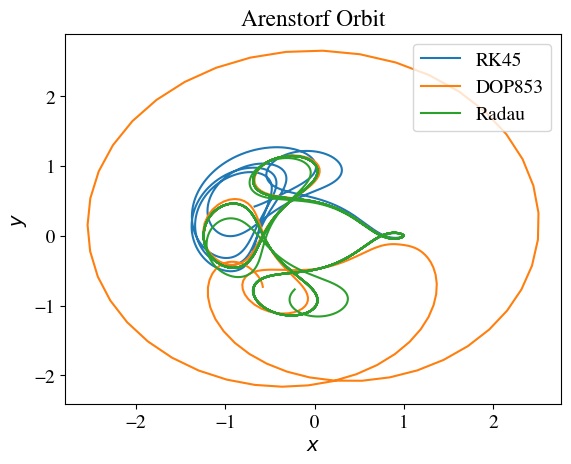

In [7]:

def orbit(t, y): 
    dy = np.zeros(4)
    dy[0] = y[2]
    dy[1] = y[3]
    mu = 0.012277471
    r1 = math.sqrt(((y[0] + mu)**2 + y[1]**2))
    r2 = math.sqrt(((y[0] - 1 + mu)**2 + y[1]**2))

    dy[2] = y[0] + 2*y[3] - ((1-mu)*(y[0] + mu)/(r1**3)) - (mu*(y[0] - 1+mu)/(r2**3))
    dy[3] = y[1] - 2*y[2] - (1-mu)*y[1]/(r1**3) - mu*y[1]/(r2**3)

    return dy


y0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
tmax = 17.0652165601579625588917206249
solvers = ['RK45','DOP853', 'Radau']
for method in solvers:
    tic = time.time()
    orbit_sol = solve_ivp(orbit, t_span=[0, tmax], y0=y0, method=method, atol=10**(-12), rtol=10**(-12))
    toc = time.time()
    cpuTime = toc - tic
    print(f"-------------- {method} ---------------")
    print(f"CPU Time: {cpuTime} seconds")
    print("-------------------------------------")
    plt.plot(orbit_sol.y[0], orbit_sol.y[1], label = f'{method}')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Arenstorf Orbit')
plt.legend()
plt.show()


-------------- RK45 ---------------
CPU Time: 1.8671963214874268 seconds
-------------------------------------


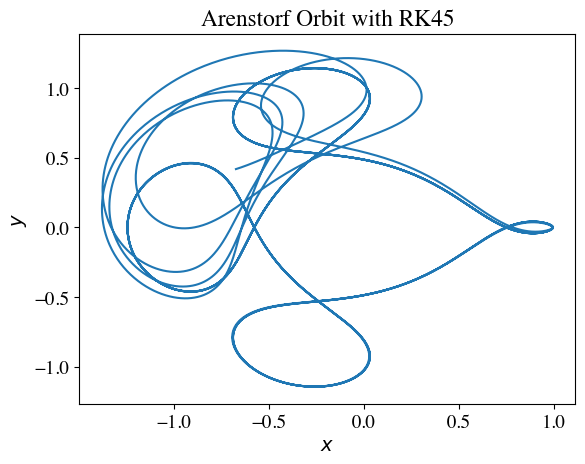

-------------- DOP853 ---------------
CPU Time: 0.5741117000579834 seconds
-------------------------------------


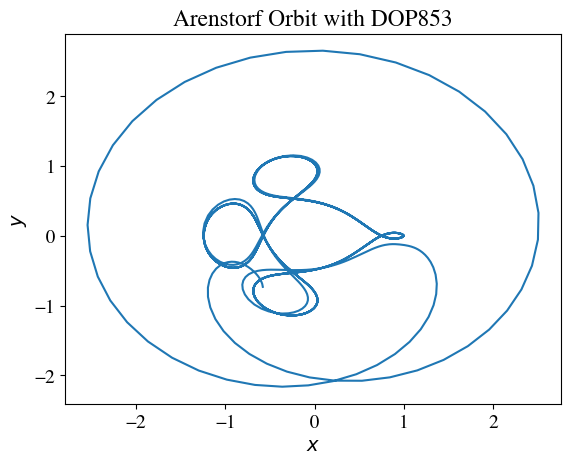

-------------- Radau ---------------
CPU Time: 39.69588279724121 seconds
-------------------------------------


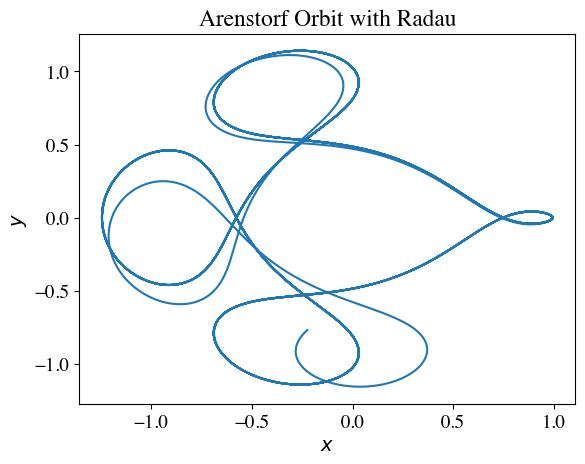

In [8]:
tmax = 100 
for method in solvers:
    tic = time.time()
    orbit_sol = solve_ivp(orbit, t_span=[0, tmax], y0=y0, method=method, atol=10**(-12), rtol=10**(-12))
    toc = time.time()
    cpuTime = toc - tic
    print(f"-------------- {method} ---------------")
    print(f"CPU Time: {cpuTime} seconds")
    print("-------------------------------------")
    plt.plot(orbit_sol.y[0], orbit_sol.y[1], label = f'{method}')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title(f'Arenstorf Orbit with {method}')
    plt.show()

### Problem 2: Regions of Absolute Stability 

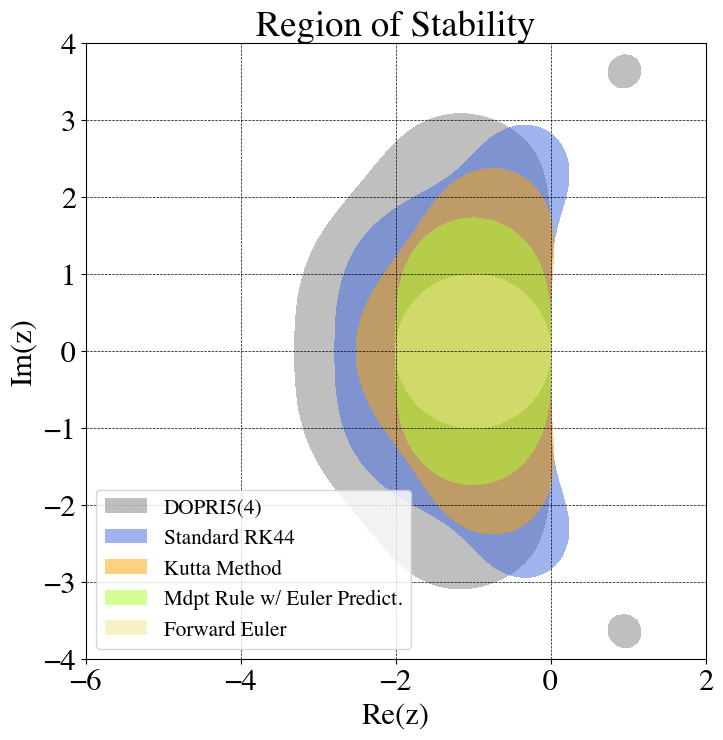

<Figure size 640x480 with 0 Axes>

In [17]:
nx = 100
ny = 160
x = np.linspace(-6,2,nx)
y = np.linspace(-4,4,ny)
xg,yg = np.meshgrid(x,y)

z = xg + 1j*yg 

def forwardEuler_stabF(z): 
    return 1+z 
def midpointRuleEulerPredict_stabF(z):
    return 1 + z + 0.5*z**2

def Kutta_stabF(z):
    A = np.array([[0, 0, 0], 
                  [.5, 0, 0], 
                  [-1, 2, 0]])
    b = np.array([1/6, 2/3, 1/6])
    c = np.array([0, .5, 1])
    z1 = b[0] + b[1] + b[2] 
    z2 = b[1]*A[1,0] + b[2]*A[2,0] + b[2]*A[2,1]
    z3 = b[2]*A[2,1]*A[1,0]
    return 1 + z + (1/2)*(z**2) + (1/6)*(z**3)
def RK44_stabF(z): 
    # A = np.array([[0, 0, 0, 0], 
    #             [.5, 0, 0, 0], 
    #             [0, .5, 0, 0], 
    #             [0, 0, 1, 0]])
    # b = np.array([1/6, 1/3, 1/3, 1/6])
    # z1 = b[0] + b[1] + b[2] +b[3]
    # z2 = b[1]*A[1,0] + b[2]*A[2,0] + b[2]*A[2,1] +b[3]*A[3,0] +b[3]*A[3,1] +b[3]*b[2]*A[3,2] 
    # z3 = b[2]*A[2,1]*A[1,0] + b[2]*b[3]*A[3,2]*(A[2,0] +A[2,1])
    # z4 = b[3]*b[2]*A[3,2]*A[2,1]*A[1,0]
    return 1 + z + (1/2)*(z**2) + (1/6)*(z**3) + (1/24)*(z**4)
    
def DOPRI5_stabF_helper(z):
    

    A = np.array([[0, 0, 0, 0, 0, 0, 0],
                [1/5, 0, 0, 0, 0, 0, 0], 
                [3/40, 9/40, 0, 0, 0, 0, 0], 
                [44/45, -56/15, 32/9, 0, 0, 0, 0], 
                [19372/6561, -25360/2187, 64448/6561, -212/729, 0, 0, 0],                
                [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656, 0, 0],
                [35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0]], dtype=np.complex_)
    b = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0], dtype=np.complex_)
    p = A.shape[0]
    matrix_prod = np.eye(p,dtype=np.complex_)
    for s in range(1, p):
        matrix_prod += (z**s)*(np.linalg.matrix_power(A, s)) 
    return 1+z*(b.T@matrix_prod@np.ones((p,1)))

def DOPRI5_stabF(z):

    z_temp= z.flatten()
    z_flat = np.array([DOPRI5_stabF_helper(z_temp[x]) for x in range(z_temp.size)], dtype=np.complex_)
    z_DOP = np.reshape(z_flat, (y.size, x.size))
    return z_DOP


plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8,8))

f = DOPRI5_stabF(z)
absf = (f.real)**2 + (f.imag)**2
cntr1 = ax.contourf(xg,yg,absf,np.arange(2), colors='grey', alpha=0.5) 

f = RK44_stabF(z)
absf = (f.real)**2 + (f.imag)**2
cntr2 =ax.contourf(xg,yg,absf,np.arange(2),  colors='royalblue', alpha=0.5) 

f = Kutta_stabF(z)
absf = (f.real)**2 + (f.imag)**2
cntr3 =ax.contourf(xg,yg,absf,np.arange(2),  colors='orange', alpha=0.5) 

f = midpointRuleEulerPredict_stabF(z)
absf = (f.real)**2 + (f.imag)**2
cntr4 =ax.contourf(xg,yg,absf,np.arange(2),  colors='greenyellow', alpha=0.5)  

f = forwardEuler_stabF(z)
absf = (f.real)**2 + (f.imag)**2
cntr5= ax.contourf(xg,yg,absf,np.arange(2),  colors='khaki', alpha=0.5)  




plt.title("Region of Stability")
plt.xlabel(r"Re(z)")
plt.ylabel(r"Im(z)")

#ax.set_aspect(1)
plt.grid(color='k', linestyle='--', linewidth=0.5)
h1,_ = cntr1.legend_elements()
h2,_ = cntr2.legend_elements()
h3,_ = cntr3.legend_elements()
h4,_ = cntr4.legend_elements()
h5,_ = cntr5.legend_elements()
ax.legend([h1[0], h2[0], h3[0], h4[0], h5[0]], 
        ['DOPRI5(4)', 'Standard RK44', 'Kutta Method', 'Mdpt Rule w/ Euler Predict.', 'Forward Euler'], 
        loc="lower left", fontsize='x-small')

plt.show()
plt.savefig('RAS.pdf')
